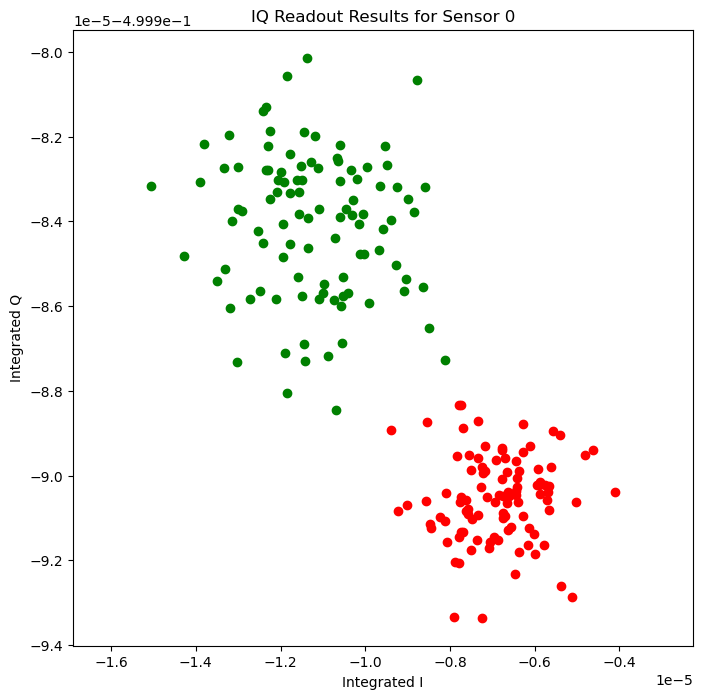

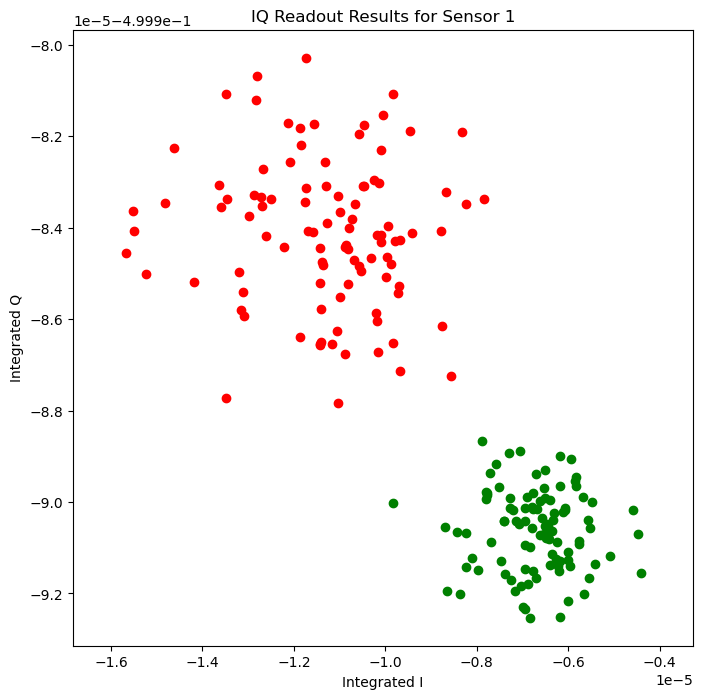

In [32]:
# src/readout_simulator/main.py
import sys
import os
import importlib
# Add the src directory to the Python path
sys.path.append(os.path.abspath('src'))


import numpy as np
import simulator as sm
from sensor import Resonator
from noise_models import OverFNoise
from quantum_dot_system import QuantumDotSystem
importlib.reload(sm)



Cdd_3dot = np.array([[10, -1], [-1, 12]]) * 1e-18
Cds_3dot = np.array([[-1, 0.1], [0.1, -1.2]]) * 1e-21


dot_system = QuantumDotSystem(Cdd_3dot, Cds_3dot)

# --- Simulation Parameters ---
params = { 
    'SNR_white': 1e2,
    'eps0': 0.5  # Nominal position on the Coulomb peak
}
t_end = 25
charge_states = [np.array([1, 0]), np.array([0, 1])]*100

# --- Run Simulation ---
simulator = sm.ReadoutSimulator(
    dot_system=dot_system, 
    noise_model= OverFNoise(
                n_fluctuators=1, s1=10 * 1e-99, sigma_couplings=1e-99,
                ommax=1 / 1, ommin=1 / 5,
                dt=1
            )
)
simulator.run_simulation(charge_states, t_end, params)
simulator.plot_results()




In [9]:
Cds_3dot.T @ Cdd_inv 

array([[-0.10146256, -0.00302262, -0.02320593],
       [ 0.00087754, -0.09818643,  0.01392356]])

In [14]:
Cdd_inv

array([[1.01209048e+17, 9.16536661e+15, 5.85023401e+15],
       [9.16536661e+15, 8.56084243e+16, 1.20904836e+16],
       [5.85023401e+15, 1.20904836e+16, 9.28237129e+16]])

In [13]:
Cds_3dot

array([[-1.0e-18,  1.0e-19],
       [ 1.0e-19, -1.2e-18],
       [-2.0e-19,  3.0e-19]])